# Topic: Accused Witches in Scottland

# Describe

## What   is   the   general   type   of   the   data ? 

In [11]:
import pandas as pd

data=pd.read_csv("WDB_Accused.csv")
data.head()

,AccusedRef,AccusedSystemId,AccusedID,FirstName,LastName,M_Firstname,M_Surname,Alias,Patronymic,DesTitle,...,Res_NGR_Northing,Ethnic_origin,MaritalStatus,SocioecStatus,Occupation,Notes,Createdby,Createdate,Lastupdatedby,Lastupdatedon
0,A/EGD/10,EGD,10,Mareon,Quheitt,Marion,White,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,SMD,15/05/2001 11:06:51,jhm,09/08/2002 11:40:51
1,A/EGD/100,EGD,100,Thom,Cockburn,Thomas,Cockburn,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,SMD,15/05/2001 11:06:51,jhm,02/10/2002 10:32:30
2,A/EGD/1000,EGD,1000,Christian,Aitkenhead,Christine,Aikenhead,NaN,NaN,NaN,...,NaN,NaN,Married,NaN,NaN,NaN,SMD,15/05/2001 11:06:51,jhm,01/10/2002 10:48:12
3,A/EGD/1001,EGD,1001,Janet,Ireland,Janet,Ireland,NaN,NaN,NaN,...,NaN,NaN,Widowed,NaN,NaN,NaN,SMD,15/05/2001 11:06:51,jhm,01/10/2002 10:49:00
4,A/EGD/1002,EGD,1002,Agnes,Hendersoun,Agnes,Henderson,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,SMD,15/05/2001 11:06:51,jhm,01/10/2002 10:50:07


Our group was tabular data of witched accused in form of a csv file, which is one of the relational tables in the whole dataset of witches.

## Database filed types and meanings

Data types in each column:

In [12]:
data.dtypes

AccusedRef           object
AccusedSystemId      object
AccusedID             int64
FirstName            object
LastName             object
M_Firstname          object
M_Surname            object
Alias                object
Patronymic           object
DesTitle             object
Sex                  object
Age                 float64
Age_estcareer          bool
Age_estchild           bool
Res_settlement       object
Res_parish           object
Res_presbytery       object
Res_county           object
Res_burgh            object
Res_NGR_Letters      object
Res_NGR_Easting     float64
Res_NGR_Northing    float64
Ethnic_origin        object
MaritalStatus        object
SocioecStatus        object
Occupation           object
Notes                object
Createdby            object
Createdate           object
Lastupdatedby        object
Lastupdatedon        object
dtype: object

Some columns'name description:

    Age_estcareer          Indicates that age has been estimated from career 
    Age_estchild           Indicates that age has been estimated from the existence of children 

    Res_settlement       Place of residence - settlement
    Res_parish           Place of residence - parish 
    Res_presbytery       Place of residence - presbytery 
    Res_county           Place of residence - county 
    Res_burgh            Place of residence - burgh 
    
    Res_NGR_Letters      Grid reference of place of residence - letters 
    Res_NGR_Easting    Grid reference of place of residence - easting 
    Res_NGR_Northing   Grid reference of place of residence - northing 

    Ethnic_origin        Ethnic origin 


    TRACKING FIELDS: 
    SYSTEM ID, CREATION LOGS AND OTHER NON-ESSENTIAL FIELDS
    
    SUBJECTIVE FIELDS BY TABLE:
    (Fields for which statistics should be generated cautiously)
    ‘WDB_Accused’ Age
    Age_estcareer Age_estchild SocioecStatus

    DEAD FIELDS TYPES BY TABLE:
    (Fields the researchers did not systematically use)
    ‘WDB_Accused’ Patronymic
    Ethnic_Origin

## Database Layout and links   between   this   data   and   other   data  

The whole database consists of three levels. Each level contains a series of linked tables, some of which are reference tables that supply set lists of possible data for specific fields. The first level is the accused. The ‘Accused’ is a self-contained set of fields and reference tables that can be searched on its own. The second level is the ‘Case’, comprising all the detail of the accusation. The third level comprises two sets of information that are embedded within the ‘Case’ – the ‘Trial Process’ and ‘References’. Both of these sets of information are in a one-to-many relationship with the ‘Case’. 

Our data is ‘Accused’ ,which is level one:

The ‘Accused’ table contains biographical information about each accused witch. It includes the name, sex, residence, occupation, etc. for each accused in the database. See ‘Database Field Descriptions’ for a full list and description of these fields. The database allows for only one accused level to be defined for each person accused of witchcraft, thus assembling all known references to one individual in their own unique record.

AccusedRef is the unique identifier of data.There is no foreign keys in this data.

## Data description

How large and complex is it  ?

In [13]:
data.shape

(3219, 31)

3219 rows X 31 columns

In [14]:
data.size

99789

Statistics  about  the  data : max/min/count/std/variation/structure

In [15]:
data.describe()[['AccusedID','Age']]

,AccusedID,Age
count,3219.000000,166.000000
mean,1732.604536,43.126506
std,957.172887,14.205919
min,4.000000,9.000000
25%,909.500000,34.250000
50%,1759.000000,45.000000
75%,2636.500000,50.000000
max,3244.000000,100.000000


Common Categorical Values:

In [16]:
col=['AccusedSystemId','Sex','MaritalStatus','SocioecStatus','Occupation']

for i in col:
    print(data[i].value_counts())
    print("**************************************")

EGD    2305
LA      507
JO      407
Name: AccusedSystemId, dtype: int64
**************************************
Female    2702
Male       468
Name: Sex, dtype: int64
**************************************
Married            575
Widowed            140
Single              16
Unknown              3
Irregular union      2
/                    1
Name: MaritalStatus, dtype: int64
**************************************
Middling           231
Lower               72
Very Poor           18
Landless            16
Upper               16
Lairds/Baron         5
Nobility/Chiefs      4
Name: SocioecStatus, dtype: int64
**************************************
Servant           23
Vagabond          23
Midwife            9
Weaver             8
Miller             3
Shop-keeper        2
School teacher     2
Farmer             2
Tailor             2
Messenger          2
Minister           2
Smith              2
Nurse              2
Merchant           2
Cook               1
Collier            1
School Master  

## The relationship between the data and questions that the data owner has discussed with us

1.Create a model for witches by exploring this csv file and looking into example Wikidata items and the list of properties.

2.Create that example as a real item of data on Wikidata using the Create New Item option on Wikidata and then arrange that model in Google sheets for the 3000 items we are looking to create.

3.Import 3000+ entries into wikidata.

4.Visualise the information in a multitude of ways using the SPARQL examples in the Wikidata query service and Histropedia’s Wikidata viewer.

# Explore 

How many data are incomplete:

In [17]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import re
import pyproj
import folium

plotly.tools.set_credentials_file(username='chicone1003', api_key='5mMSIppbkvLI8XBzbFg4')


notnull=data.count()
isnull=data.count().AccusedRef-data.count()
nullornot=pd.concat([notnull,isnull],axis=1).reset_index()
nullornot.columns=['column','notnullcount','isnullcount']

import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Bar(
    x=nullornot.column,
    y=nullornot.notnullcount,
    name='not null'
)
trace2 = go.Bar(
    x=nullornot.column,
    y=nullornot.isnullcount,
    name='null'
)

d = [trace1, trace2]
layout = go.Layout(
    title='Incomplete Data statistics',
    barmode='stack'
)

fig = go.Figure(data=d, layout=layout)
py.iplot(fig, filename='stacked-bar')



High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~chicone1003/0 or inside your plot.ly account where it is named 'stacked-bar'


The number of witches who were not marked with specific sex:

## Sex

In [18]:
data.loc[(data.Sex!='Female') & (data.Sex!='Male')].count().AccusedRef

49

Were females witches accused than males witches? What is the difference?

In [19]:
gsc=data.groupby('Sex').count()
gsc.AccusedRef

Sex
Female    2702
Male       468
Name: AccusedRef, dtype: int64

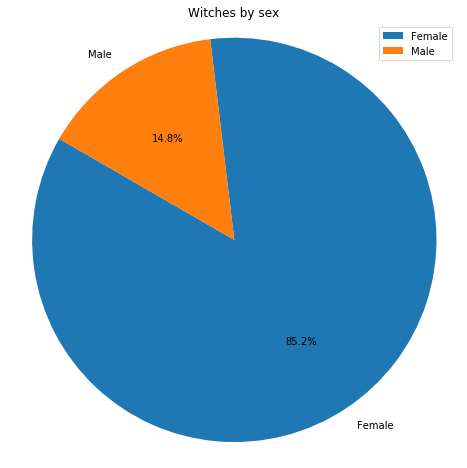

In [20]:
# Data to plot


labels = gsc.T.columns
sizes = gsc.AccusedID

#explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=150)
 
plt.axis('equal')
plt.title('Witches by sex')
plt.legend()
plt.show()

A large propostion of witches are female,but there are also 11.3% of witches are male.

## Age

How many age of witches is null and is not null?

In [21]:
print("is null:")
print(data[pd.isnull(data.Age)].count().AccusedRef)
print("is not null:")
print(data[~pd.isnull(data.Age)].count().AccusedRef)

is null:
3053
is not null:
166


How many witches has accurate age?(some people's age is estimatied by their child or their career)

In [22]:
data[(~data.Age_estcareer)&(~data.Age_estchild)&(~pd.isnull(data.Age))].count().AccusedRef

28

The distribution of witches'age:

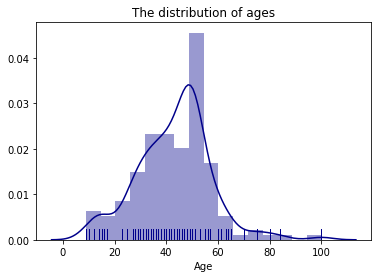

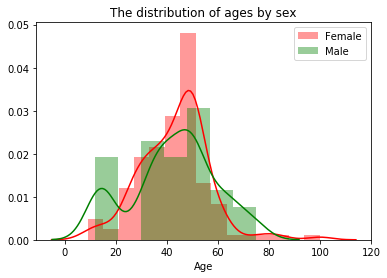

In [23]:
dataAge=data[~pd.isnull(data.Age)]

sns.distplot(dataAge.Age,color='darkblue',rug=True)
plt.title("The distribution of ages")
plt.show()


sns.distplot(dataAge[dataAge.Sex=='Female'].Age,color='red',label='Female')
sns.distplot(dataAge[dataAge.Sex=='Male'].Age,color='green',label='Male')
plt.legend()
plt.title("The distribution of ages by sex")
plt.show()

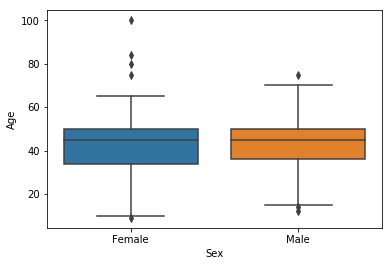

In [24]:
sns.boxplot(x='Sex',y='Age',data=data)

For both female witches and male witches,most of them were 40-60 years old.
And for male witches, there are also a relatively high proportion among 10-20 years old.
And one of the witches were 100 years old.

## Socio-economic status

Which socio-economic status is the most in this form?

In [25]:
ssdata=data
ss=ssdata.groupby('SocioecStatus').count()
ss.AccusedRef

SocioecStatus
Lairds/Baron         5
Landless            16
Lower               72
Middling           231
Nobility/Chiefs      4
Upper               16
Very Poor           18
Name: AccusedRef, dtype: int64

In [26]:
labels = ss.T.columns
values = ss.AccusedRef

trace = go.Pie(labels=labels, values=values)

layout = go.Layout(
    title='Proportion of different socio-economic status among witches'
    #barmode='stack'
)

py.iplot([trace],layout=layout, filename='basic_pie_chart')


In [27]:
#print(ss.iloc[0].AccusedRef )

#ss.reset_index()

nnrc=ss.iloc[1].AccusedRef+ss.iloc[2].AccusedRef+ss.iloc[6].AccusedRef+ss.iloc[3].AccusedRef
#print(nrc)
rrc=ss.iloc[0].AccusedRef+ss.iloc[5].AccusedRef
ooc=ss.iloc[4].AccusedRef
#+ss.loc[ss.SocioecStatus=='Very Poor'].AccusedRef



labels = ['not rich','rich','other']
values=[nnrc,rrc,ooc]
trace = go.Pie(labels=labels, values=values)



py.iplot([trace],layout=layout, filename='basic_pie_chart')

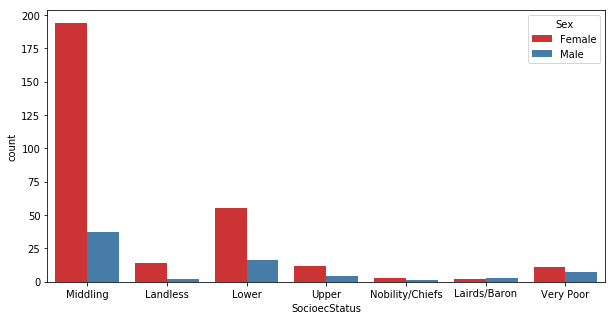

In [28]:
#sns.boxplot(x='SocioecStatus',y='Age',hue='Sex',data=data,palette='Set3')
plt.figure(figsize=(10,5))
sns.countplot(x="SocioecStatus",hue='Sex' ,data=data,palette='Set1')

From piecharts:

    Most of witches are middling class,the percentage of which takes up 63.8%.

    The people who are not rich (including Landless,Lower,Very Poor,Middling) occupies 93.1% of whole witches in our data.The rich (including upper and landless )only takes up 5.8%.

    Landless takes up more than landless

    Lower and middling takes up more than upper
    
From barchart:

    Female witches and male witches has the similar distribution among different Socio-economic status.However,the number of male witches who are upper status is smallest.For female witches,very poor witches occupies smallest proportion.

## Marital status

In [29]:
ndf=data
ndf.drop(ndf.index[ndf['MaritalStatus'].isnull()],inplace=True)
ndf.drop(ndf.index[ndf['MaritalStatus']=='/'],inplace=True)
ndf.drop(ndf.index[ndf['MaritalStatus']=='Unknown'],inplace=True)
ms=ndf.groupby('MaritalStatus').count()

#data['MaritalStatus'].replace(('/','Unknown'),(None,None),inplace=True)
ms.AccusedRef

MaritalStatus
Irregular union      2
Married            575
Single              16
Widowed            140
Name: AccusedRef, dtype: int64

In [30]:
labels = ms.T.columns
values = ms.AccusedRef

trace = go.Pie(labels=labels, values=values)

py.iplot([trace], filename='basic_pie_chart')

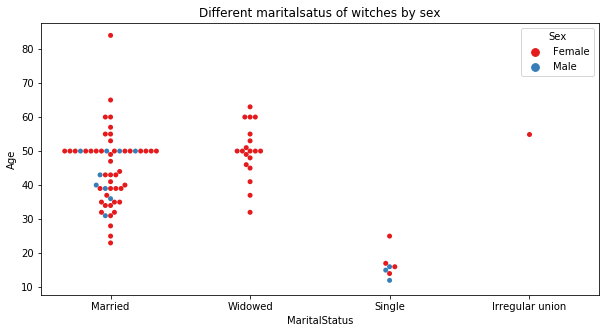

In [31]:
#sns.boxplot(x='SocioecStatus',y='Age',hue='Sex',data=data,palette='Set3')
#colors = ["amber", "dusty purple"]
plt.figure(figsize=(10,5))
#sns.countplot(x="MaritalStatus",hue='Sex' ,data=ndf,palette='Set1')
plt.title("Different maritalsatus of witches by sex")

sns.swarmplot(x="MaritalStatus",y='Age',hue='Sex' ,data=data,palette='Set1')
#sns.stripplot(x="SocioecStatus",y='Age',hue='Sex' ,data=data,palette='Set1');

The piechart shows 78.4% of witches are married,followed by widowed witches of which the percentage is 19.1%.

The barchart illustrates no matter witches are female or male,most of them are married.

## Occupations

Text(0.5,1,'Different occupations of witches by sex')

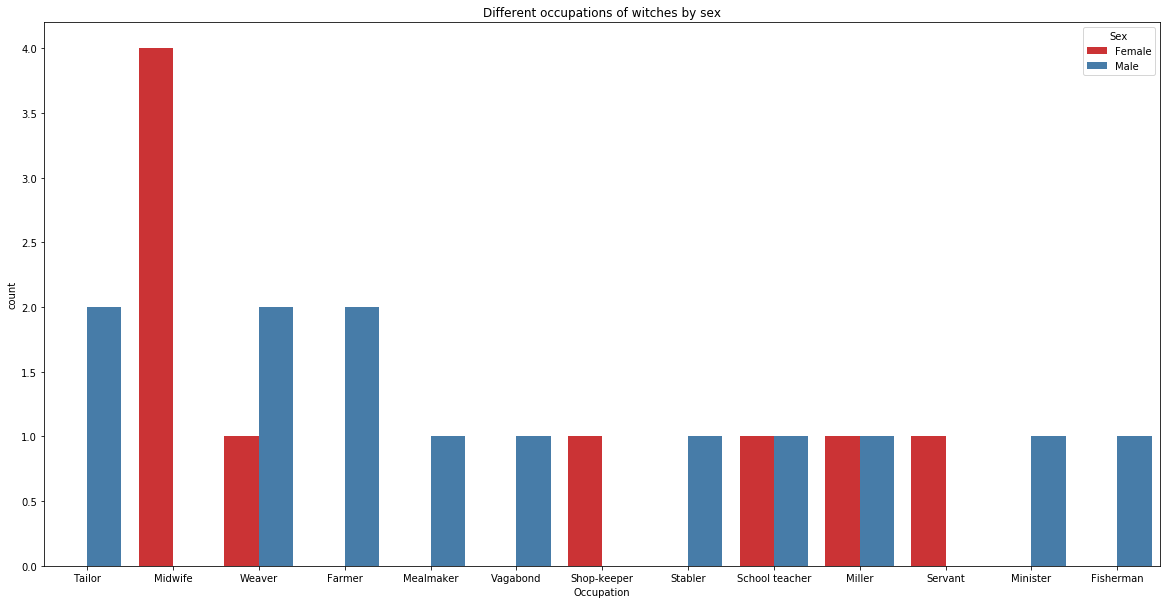

In [32]:
plt.figure(figsize=(20,10))
sns.countplot(x="Occupation",hue='Sex' ,data=ndf,palette='Set1')
plt.title("Different occupations of witches by sex")

Most of female witches did not have occupations.Some of them were working at service industry.
Although there are male witches working as minister,most of them worked at ground level.

## Geographic location

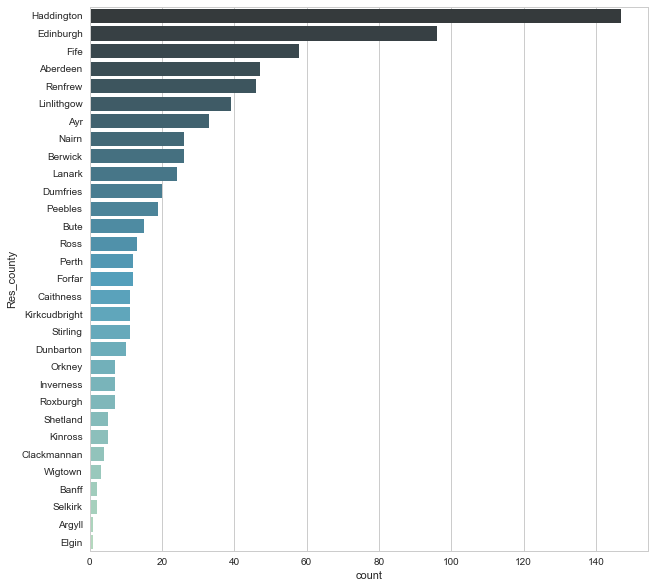

In [33]:
sns.set(style="white") 
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
ax = sns.countplot(y='Res_county',data=data,order = data['Res_county'].value_counts().index,palette='GnBu_d')

In [34]:
import re
a=data[['SocioecStatus','Res_county']]

a.fillna('unknown')

ss=a.SocioecStatus.value_counts().reset_index()
ss.columns=['SocioecStatus','count']
ssn=ss.SocioecStatus

rc=a.Res_county.value_counts().reset_index()
rc.columns=['Res_county','count']
rcn=rc.Res_county

z = []

for s in ssn:
    new_row = []
    for r in rcn:
        number=data[(data.SocioecStatus==s )&(data.Res_county==r)].count().AccusedRef
        new_row.append(number)

    z.append(list(new_row))

dd = [
go.Heatmap(
        z=z,
        x=rcn,
        y=ssn,
        colorscale='Viridis',
    )
]

layout = go.Layout(
    title='Different counties and different socie-econmic status',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' )
)

fig = go.Figure(data=dd, layout=layout)
py.iplot(fig)

In [35]:

placedata=data[['Res_NGR_Letters','Res_NGR_Easting','Res_NGR_Northing','Res_county']]

newplacedata=placedata.dropna()

newstring= []
for ind,val in newplacedata.iterrows():
    newstring.append(val['Res_NGR_Letters'] + str(int(val['Res_NGR_Easting'])).zfill(3) + str(int(val['Res_NGR_Northing'])).zfill(3))

newplacedata['NGR'] = newstring
#newplacedata

/Users/wangyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [36]:
groupngr=newplacedata.groupby('NGR').Res_NGR_Letters.count().reset_index()
groupngr.columns=['NGR','count']
groupngr

,NGR,count
0,NH512413,4
1,NH576495,2
2,NH605894,1
3,NH779820,1
4,NH790670,2
5,NJ883645,6
6,NO600500,2
7,NS850050,1
8,NT090874,6
9,NT130829,1


In [37]:
countyname=[]
for i,val in groupngr.iterrows():
    ngr=val.NGR
    ff=newplacedata[newplacedata.NGR==ngr].Res_county
    countyname.append(ff.iloc[0])
        

In [38]:


import re

# Region codes for 100 km grid squares.
_regions = [['HL', 'HM', 'HN', 'HO', 'HP', 'JL', 'JM'],
            ['HQ', 'HR', 'HS', 'HT', 'HU', 'JQ', 'JR'],
            ['HV', 'HW', 'HX', 'HY', 'HZ', 'JV', 'JW'],
            ['NA', 'NB', 'NC', 'ND', 'NE', 'OA', 'OB'],
            ['NF', 'NG', 'NH', 'NJ', 'NK', 'OF', 'OG'],
            ['NL', 'NM', 'NN', 'NO', 'NP', 'OL', 'OM'],
            ['NQ', 'NR', 'NS', 'NT', 'NU', 'OQ', 'OR'],
            ['NV', 'NW', 'NX', 'NY', 'NZ', 'OV', 'OW'],
            ['SA', 'SB', 'SC', 'SD', 'SE', 'TA', 'TB'],
            ['SF', 'SG', 'SH', 'SJ', 'SK', 'TF', 'TG'],
            ['SL', 'SM', 'SN', 'SO', 'SP', 'TL', 'TM'],
            ['SQ', 'SR', 'SS', 'ST', 'SU', 'TQ', 'TR'],
            ['SV', 'SW', 'SX', 'SY', 'SZ', 'TV', 'TW']]
# Reshuffle so indices correspond to offsets
_regions = np.array([_regions[x] for x in range(12, -1, -1)])
_regions = _regions.transpose()


# -------------------------------------------------------------------------------
def to_osgb36(coords):
    
    if type(coords) == list:
        return [to_osgb36(c) for c in coords]
    elif type(coords) == tuple:
        return tuple([to_osgb36(c) for c in coords])
    elif type(coords) == type(np.array('string')):
        return np.array([to_osgb36(str(c)) for c in list(coords)])
    #
    # Input is grid reference...
    #
    elif type(coords) == str and re.match(r'^[A-Za-z]{2}(\d{6}|\d{8}|\d{10})$', coords):
        region = coords[0:2].upper()
        x_box, y_box = np.where(_regions == region)
        try:  # Catch bad region codes
            x_offset = 100000 * x_box[0]  # Convert index in 'regions' to offset
            y_offset = 100000 * y_box[0]
        except IndexError:
            raise ValueError('Invalid 100km grid square code')
        nDigits = (len(coords) - 2) / 2
        factor = 10 ** (5 - nDigits)
        x, y = (int(coords[2:2 + int(nDigits)]) * factor + x_offset,
                int(coords[2 + int(nDigits):2 + 2 * int(nDigits)]) * factor + y_offset)
    
        return x, y
    #
    # Catch invalid input
    #
    else:
        raise TypeError(
            'Valid inputs are 6,8 or 10-fig references as strings e.g. "NN123321", or lists/tuples/arrays of strings.')





In [39]:
import pyproj



sn2004 = pyproj.Proj(
    "+proj=lcc +lat_1=64.25 +lat_2=65.75 +lat_0=65 +lon_0=-19 +x_0=1700000 +y_0=300000 +no_defs +a=6378137 +rf=298.257222101 +to_meter=1")


wgs84 = pyproj.Proj("+init=EPSG:4326")  # LatLon with WGS84 datum used by GPS units and Google Earth
osgb36 = pyproj.Proj("+init=EPSG:27700")  # UK Ordnance Survey, 1936 datum
UTM26N = pyproj.Proj("+init=EPSG:32626")  # UTM coords, zone 26N, WGS84 datum
UTM27N = pyproj.Proj("+init=EPSG:32627")  # UTM coords, zone 27N, WGS84 datum
UTM28N = pyproj.Proj("+init=EPSG:32628")  # ... you get the picture


In [40]:
lon=[]
la=[]
for ind,val in groupngr.iterrows():
    x, y = to_osgb36(val.NGR)
    Longitude,Latitude=pyproj.transform(osgb36, wgs84, x, y)
    lon.append(Longitude)
    la.append(Latitude)

In [41]:

import folium



m = folium.Map(location=[57.190300, -3.818836], tiles="Mapbox Bright", zoom_start=7)


for i in range(0,len(la)):
    folium.Circle(
    location=[la[i], lon[i]],
    popup=countyname[i]+''+str(groupngr.iloc[i]['count']),
    radius=float(groupngr.iloc[i]['count']*1000),
    color='crimson',
    fill=True,
    fill_color='crimson'
    ).add_to(m)


m.save('313_bubble_on_folium_map1.html')
m

From this figures above,we could see most of witches lived around Haddington and Edinburgh.

And also most of them are in middling and lower class

# Reflect   and   Hypothesise:    

## Reflection

    For this file, I firstly used stacked-bar to explore incompleteness of our data, and I found there are too many blank(Nan value)in our file that it not permitted us to clean all the rows with any nan data. So, I decided not to clean them from beginning, but to clean every column when I use them to analysis.

    Actually, only one column called Age has digital value, which could be used directly in analysis and data visualization. The other information is displayed in form of string. To deal with relationship among string values, we need to reprocess data. The most common way is to count the number of different values in the same columns. Besides, selecting a readable and proper visualization form for string values are also easy for us to explore their relationship. I used heat map to find the connection between socio-economic status and the county of residence of witches.

    Although this data file provides us geographic information of some witches, but it is in form of UK national grid map reference. To visualize them, I spent much time transferring the NGR into longitude and latitude which could be used in world maps. In order to show how many witches in different places, I chose the bubble map to use circles weighing the number of witches in the map, which helps us to see the distribution of witches clearly.

    This topic accused witches is the social and cultural context of European, which I am not familiar with. So, I read more articles and literature to explore their stories and their regulation at that time, which helped me understand the result of data analysis.


## Hypothesis

1.

Some witch hunts did almost exclusively target women, in percentages as high as 85.2% of the victims. 

Because women have been subordinated to men at that time and the legal system its "judges, ministers, priests, constables, jailers, judges, doctors, torturers, jurors, executioners" were nearly 100 percent male. Many witch hunters held that women were far more susceptible to temptation by the Devil, and thus more frequently became witches. For thousands of years, people have believed women to be more susceptible to sins than men, and sinning is a clear indication of devil worship.

To test this, I need to explore more literature, ask some local people about witches, talk with students or professors in history major and visit places relating to witch hunt.

2.

Most of witches were married (78.4%) or widowed (19.1%).

When you convict a married woman as having sex with a devil, it is more likely to arouse the anger of the people and make it easier for you to kill any female you want.

To test this, I need to learn some cases about accused witches who were married and explored the public reaction of these cases.


3.

While many witch hunters explicitly went after women, very often men fell victim to the witch hunts.

Most of these were older women, with some younger women and men accused because they were related to an accused witch, usually as daughters and husbands. 

To verify this, I need to look into another data file which recorded accused family see how many husbands of witches were involved and how many male witches are were involved not because of their wives.


4.

Most of witches accused are middle or lower class or very poor and landless.

Being of low status or in some other way marginal made you a prime candidate for being accused of witchcraft in the 17th century, because they were “safe” targets for accusation.

To test this, I need to do further studies, ask the data owner, check data individually and link notes of every witches with their economic status.
